In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

 ## Задача 1

* ### Загрузка данных

In [22]:
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv')
data1['DateTime'] = pd.to_datetime(data1['DateTime'])
data2['DateTime'] = pd.to_datetime(data1['DateTime'])

* ### Фильтрация данных

* ### Удаление ошибочных измерений плотностей

In [23]:
def filtrate_by_density(data):
    condition = (data['ro1'] >= 1.0) & (data['ro1'] <= 2.5) & \
            (data['ro2'] >= 1.0) & (data['ro2'] <= 2.5) & \
            (data['ro3'] >= 1.0) & (data['ro3'] <= 2.5) & \
            (data['ro4'] >= 1.0) & (data['ro4'] <= 2.5) & \
            (data['ro_final'] >= 1.0) & (data['ro_final'] <= 2.5)
    return data[condition]

In [97]:
df1 = filtrate_by_density(data1)
df2 = filtrate_by_density(data2)
print("Количество измерений с плотностью вне данного дианазона data1.csv:" , len(data1)-len(df1))
print("Количество измерений с плотностью вне данного дианазона data2.csv:" , len(data2)-len(df1))

Количество измерений с плотностью вне данного дианазона data1.csv: 283517
Количество измерений с плотностью вне данного дианазона data2.csv: 283517


* ### Удаление дупликатов

#### Дальше работаем с одным баком

In [98]:
duplicates = df1.duplicated(subset='DateTime', keep=False)  
count_duplicates = duplicates.sum()
print("Количество дубликатов по столбцу DateTimе:", count_duplicates)
df1 = df1.drop_duplicates(subset='DateTime', keep = 'first')

Количество дубликатов по столбцу DateTimе: 124


In [314]:
display(df1)

,DateTime,Ni1,S1,Fe3O41,Ni2,S2,Fe3O42,Ni3,S3,Fe3O43,...,ro2,ro3,ro4,ro_final,ust1,ust2,ust3,ust4,v_final,level_final
0,2021-01-01 00:00:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.68910,2.01670,1.86565,1.8684,0.0,0.0,44,97.0,179,69.2796
1,2021-01-01 00:01:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.69955,2.02900,1.86145,1.8752,0.0,0.0,44,97.0,179,69.1331
2,2021-01-01 00:02:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.69980,2.04530,1.85210,1.8635,0.0,0.0,44,97.0,179,66.7399
3,2021-01-01 00:03:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.69845,2.05230,1.84420,1.8572,0.0,0.0,44,97.0,179,64.2247
4,2021-01-01 00:04:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.69470,2.06035,1.83950,1.8526,0.0,0.0,44,97.0,179,62.2955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772062,2022-06-20 23:54:00,4.75,21.60,1.3,7.25,17.20,2.9,5.94,21.90,2.2,...,1.00000,1.00000,1.83540,1.9116,30.0,40.0,0,140.0,0,-1.0000
772063,2022-06-20 23:55:00,4.75,21.60,1.3,7.25,17.20,2.9,5.94,21.90,2.2,...,1.00000,1.00000,1.83505,1.9116,30.0,40.0,0,140.0,0,-1.0000
772064,2022-06-20 23:56:00,4.75,21.60,1.3,7.25,17.20,2.9,5.94,21.90,2.2,...,1.00000,1.00000,1.83465,1.9116,30.0,40.0,0,140.0,0,-1.0000
772065,2022-06-20 23:57:00,4.75,21.60,1.3,7.25,17.20,2.9,5.94,21.90,2.2,...,1.00000,1.00000,1.83425,1.9116,30.0,40.0,0,140.0,0,-1.0000


In [99]:
df1.describe()

,Ni1,S1,Fe3O41,Ni2,S2,Fe3O42,Ni3,S3,Fe3O43,Ni4,...,ro2,ro3,ro4,ro_final,ust1,ust2,ust3,ust4,v_final,level_final
count,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,...,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000
mean,5.570088,19.540227,2.020945,5.940397,17.570919,2.575187,7.626803,19.579723,2.435386,8.921536,...,1.643056,1.709564,1.831233,1.619439,17.831042,19.925245,26.134839,128.426971,123.942925,49.527351
std,1.268834,2.701274,0.868737,1.816906,3.061700,1.348685,1.326784,3.886534,1.158174,0.478792,...,0.461167,0.356307,0.358222,0.371666,13.688479,18.758197,20.487536,22.009668,86.948272,28.859358
min,3.660000,9.930000,0.700000,2.890000,8.100000,0.200000,4.130000,11.300000,0.300000,4.540000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,62.000000,0.000000,-1.000000
25%,4.730000,19.000000,1.500000,4.500000,16.150000,1.600000,6.620000,16.700000,1.800000,8.670000,...,1.172000,1.626850,1.721950,1.238000,6.000000,10.000000,10.000000,114.000000,0.000000,40.048800
50%,5.180000,20.200000,1.800000,5.300000,18.490000,2.000000,7.430000,18.840000,2.400000,8.900000,...,1.789525,1.791800,1.894500,1.835000,18.000000,10.000000,25.000000,125.000000,164.000000,56.678900
75%,6.030000,21.200000,2.200000,7.670000,19.500000,3.500000,8.480000,21.900000,3.300000,9.150000,...,1.985500,1.911650,2.073813,1.901700,26.000000,27.000000,42.000000,140.000000,186.000000,72.307700
max,9.600000,27.700000,6.200000,10.240000,29.540000,7.900000,10.890000,38.300000,6.300000,10.440000,...,2.500000,2.500000,2.500000,2.500000,81.000000,93.000000,96.000000,213.000000,285.000000,100.000000


In [100]:
df2.describe()

,Ni1,S1,Fe3O41,Ni2,S2,Fe3O42,Ni3,S3,Fe3O43,Ni4,...,ro2,ro3,ro4,ro_final,ust1,ust2,ust3,ust4,v_final,level_final
count,489511.000000,489511.000000,489511.000000,489511.000000,489511.000000,489511.000000,489511.000000,489511.000000,489511.000000,489511.000000,...,489511.000000,489511.000000,489511.000000,489511.000000,489511.000000,489511.000000,489511.000000,489511.000000,489511.000000,489511.000000
mean,5.568483,19.542930,2.020049,5.940531,17.571865,2.575413,7.625845,19.579937,2.435563,8.922094,...,1.643323,1.709167,1.831135,1.581248,17.504653,15.561299,21.528483,114.283109,120.329104,52.081922
std,1.268105,2.699359,0.868117,1.816630,3.059767,1.348170,1.327569,3.885487,1.157981,0.478939,...,0.461102,0.356675,0.358644,0.384838,15.400116,17.814966,18.692420,30.689673,79.903916,28.733962
min,3.660000,9.930000,0.700000,2.890000,8.100000,0.200000,4.130000,11.300000,0.300000,4.540000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,51.000000,0.000000,-1.000000
25%,4.730000,19.000000,1.500000,4.500000,16.150000,1.600000,6.620000,16.700000,1.800000,8.670000,...,1.172100,1.626250,1.721700,1.000000,5.000000,0.000000,5.000000,92.000000,0.000000,44.151400
50%,5.180000,20.200000,1.800000,5.300000,18.490000,2.000000,7.430000,18.840000,2.400000,8.900000,...,1.790200,1.791700,1.894600,1.805500,15.000000,10.000000,20.000000,119.000000,155.000000,58.608100
75%,6.020000,21.200000,2.200000,7.670000,19.500000,3.500000,8.480000,21.900000,3.300000,9.150000,...,1.985500,1.911700,2.074500,1.881300,27.000000,22.000000,36.000000,135.000000,180.000000,72.551900
max,9.600000,27.700000,6.200000,10.240000,29.540000,7.900000,10.890000,38.300000,6.300000,10.440000,...,2.500000,2.500000,2.500000,2.499600,420.000000,87.000000,88.000000,240.000000,228.000000,100.000000


* ### Анализ ошибочных измерений плотностей

In [114]:
ro1_err = data1[(data1['ro1'] < 1.0) | (data1['ro1'] > 2.5)]
ro2_err = data1[(data1['ro2'] < 1.0) | (data1['ro2'] > 2.5)]
ro3_err = data1[(data1['ro3'] < 1.0) | (data1['ro3'] > 2.5)]
ro4_err = data1[(data1['ro4'] < 1.0) | (data1['ro4'] > 2.5)]
ro_final_err = data1[(data1['ro_final'] < 1.0) | (data1['ro_final'] > 2.5)]

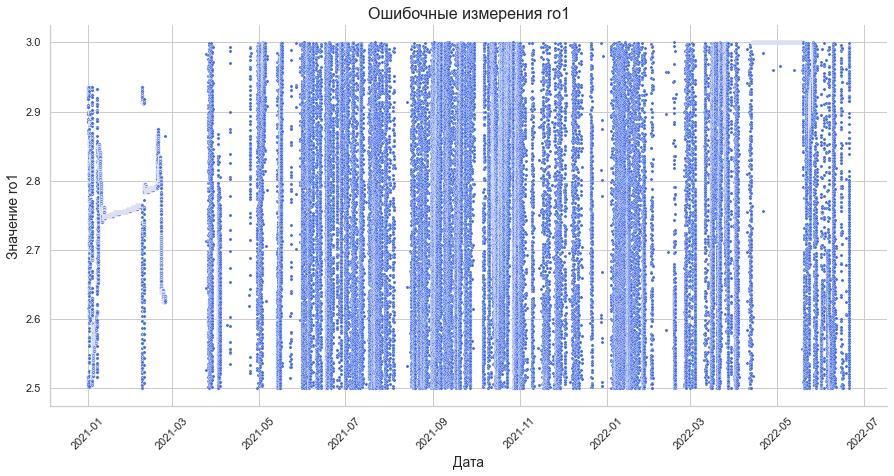

In [102]:
plt.figure(figsize=(15, 7))
sns.set(style="whitegrid")
scatter = sns.scatterplot(data=ro1_err, x="DateTime", y="ro1", color='royalblue', s=10) 
plt.title('Ошибочные измерения ro1', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Значение ro1', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
sns.despine()
plt.show()

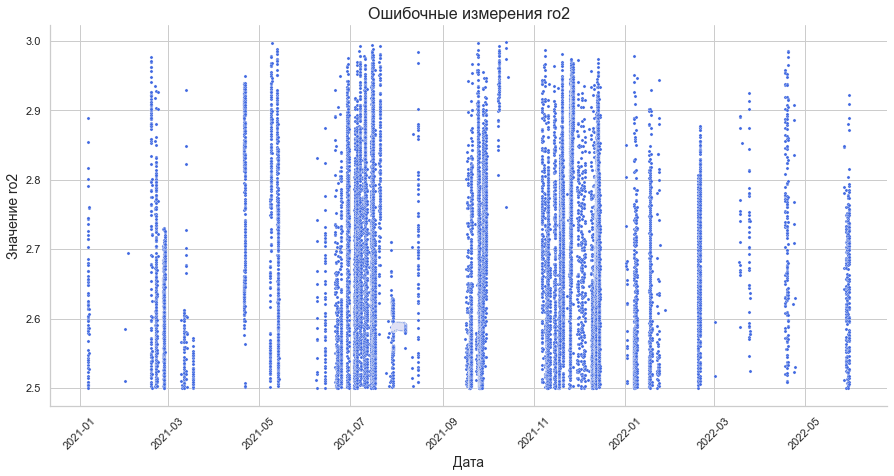

In [103]:
plt.figure(figsize=(15, 7))
sns.set(style="whitegrid")
scatter = sns.scatterplot(data=ro2_err, x="DateTime", y="ro2", color='royalblue', s=10) 
plt.title('Ошибочные измерения ro2', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Значение ro2', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
sns.despine()
plt.show()

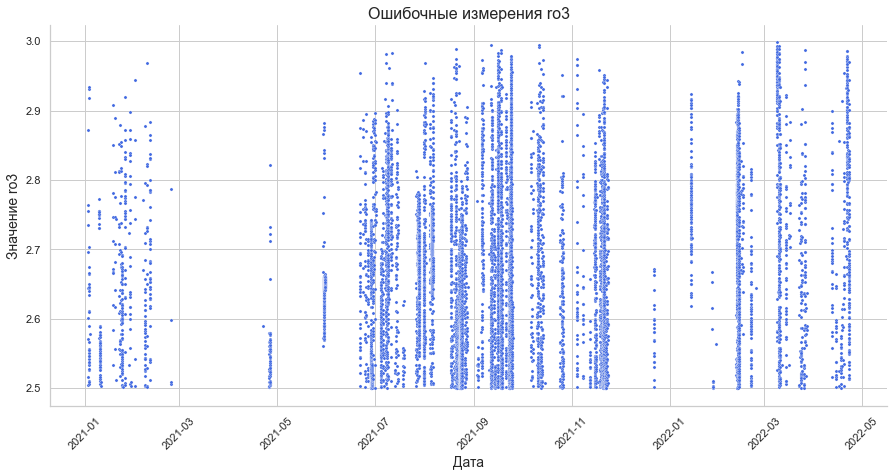

In [104]:
plt.figure(figsize=(15, 7))
sns.set(style="whitegrid")
scatter = sns.scatterplot(data=ro3_err, x="DateTime", y="ro3", color='royalblue', s=10) 
plt.title('Ошибочные измерения ro3', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Значение ro3', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
sns.despine()
plt.show()

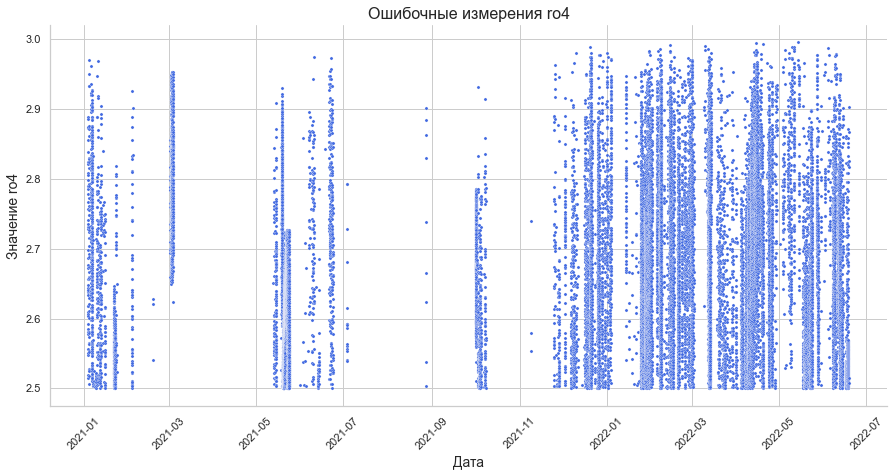

In [116]:
plt.figure(figsize=(15, 7))
sns.set(style="whitegrid")
scatter = sns.scatterplot(data=ro4_err, x="DateTime", y="ro4", color='royalblue', s=10) 
plt.title('Ошибочные измерения ro4', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Значение ro4', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
sns.despine()
plt.show()

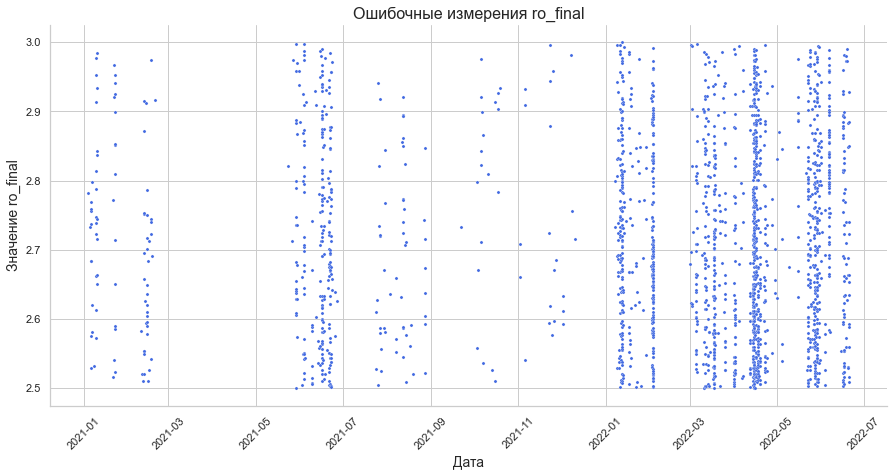

In [105]:
plt.figure(figsize=(15, 7))
sns.set(style="whitegrid")
scatter = sns.scatterplot(data=ro_final_err, x="DateTime", y="ro_final", color='royalblue', s=10) 
plt.title('Ошибочные измерения ro_final', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Значение ro_final', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
sns.despine()
plt.show()

#### Вывод: Распределение ошибочных данных дискретное

* ### Анализ выбросов данных

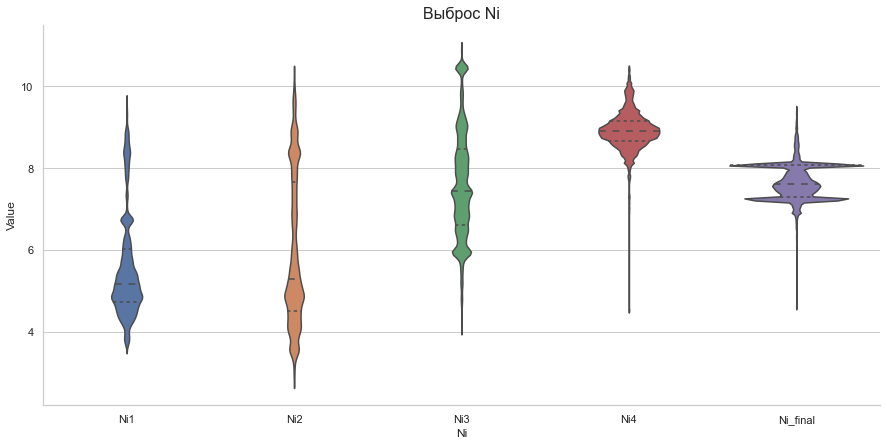

In [146]:
plt.figure(figsize=(15, 7))
plt.title('Выброс Ni', fontsize=16)
df_ = pd.melt(df1, value_vars=['Ni1', 'Ni2', 'Ni3', 'Ni4', 'Ni_final'], var_name='Ni', value_name='Value')
sns.violinplot(x='Ni', y='Value', data=df_, split=True, gap=.1, inner="quart")
sns.despine()
plt.show()

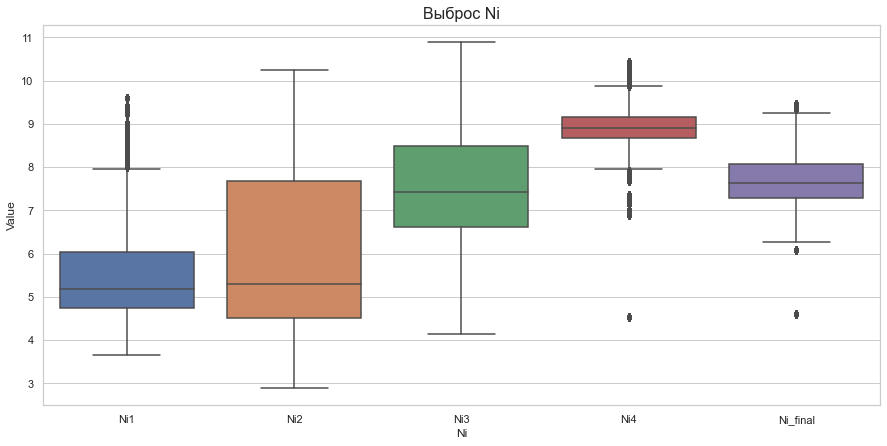

In [147]:
plt.figure(figsize=(15, 7))
plt.title('Выброс Ni', fontsize=16)
sns.boxplot(x='Ni', y='Value', data=df_)
plt.show()

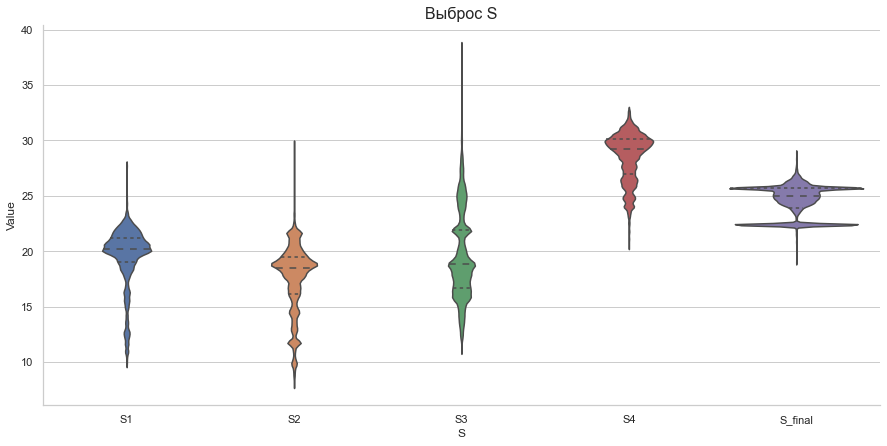

In [148]:
plt.figure(figsize=(15, 7))
plt.title('Выброс S', fontsize=16)
df_ = pd.melt(df1, value_vars=['S1', 'S2', 'S3', 'S4', 'S_final'], var_name='S', value_name='Value')
sns.violinplot(x='S', y='Value', data=df_, split=True, gap=.1, inner="quart")
sns.despine()
plt.show()

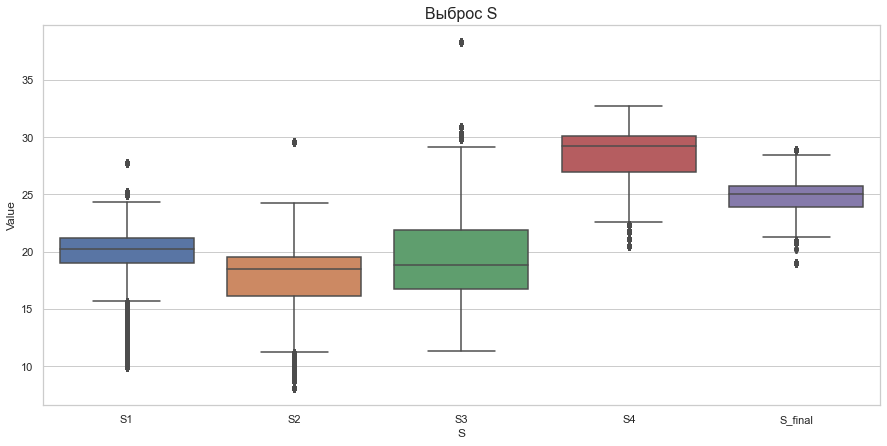

In [149]:
plt.figure(figsize=(15, 7))
plt.title('Выброс S', fontsize=16)
sns.boxplot(x='S', y='Value', data=df_)
plt.show()

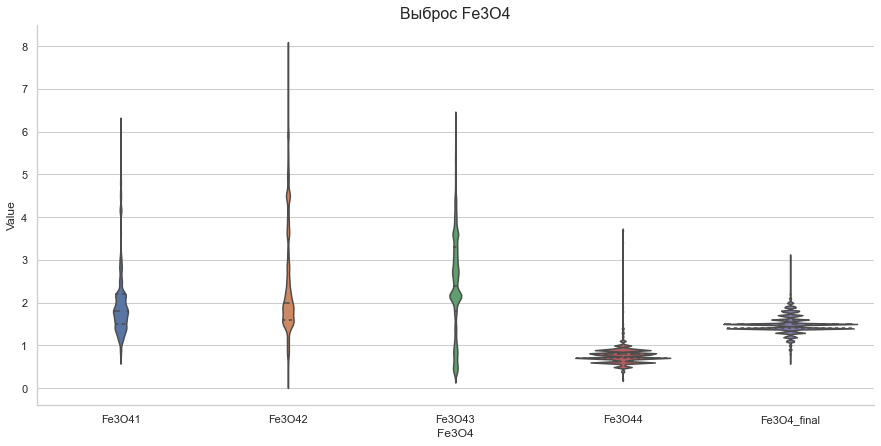

In [155]:
plt.figure(figsize=(15, 7))
plt.title('Выброс Fe3O4', fontsize=16)
df_ = pd.melt(df1, value_vars=['Fe3O41', 'Fe3O42', 'Fe3O43', 'Fe3O44','Fe3O4_final'], var_name='Fe3O4', value_name='Value')
sns.violinplot(x='Fe3O4', y='Value', data=df_, split=True, gap=.1, inner="quart")
sns.despine()
plt.show()

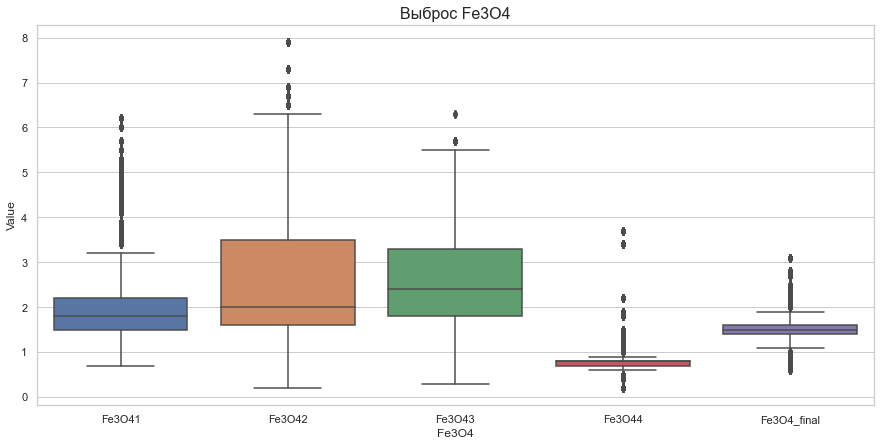

In [156]:
plt.figure(figsize=(15, 7))
plt.title('Выброс Fe3O4', fontsize=16)
sns.boxplot(x='Fe3O4', y='Value', data=df_)
plt.show()

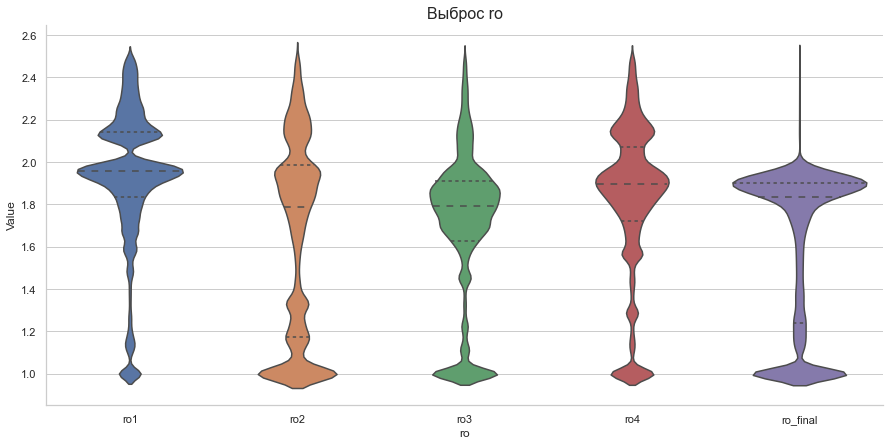

In [157]:
plt.figure(figsize=(15, 7))
plt.title('Выброс ro', fontsize=16)
df_ = pd.melt(df1, value_vars=['ro1', 'ro2', 'ro3', 'ro4', 'ro_final'], var_name='ro', value_name='Value')
sns.violinplot(x='ro', y='Value', data=df_, split=True, gap=.1, inner="quart")
sns.despine()
plt.show()

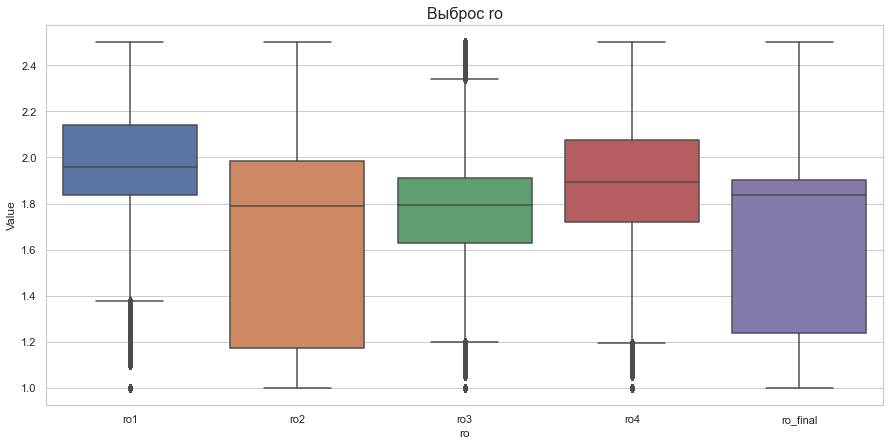

In [158]:
plt.figure(figsize=(15, 7))
plt.title('Выброс ro', fontsize=16)
sns.boxplot(x='ro', y='Value', data=df_)
plt.show()

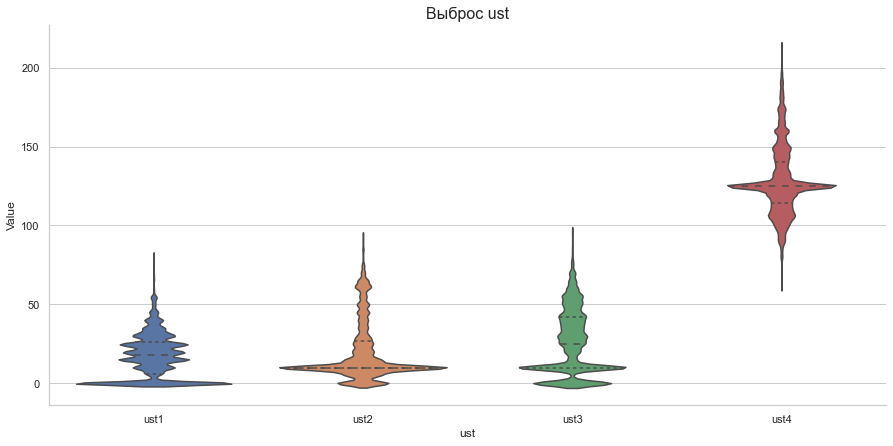

In [159]:
plt.figure(figsize=(15, 7))
plt.title('Выброс ust', fontsize=16)
df_ = pd.melt(df1, value_vars=['ust1', 'ust2', 'ust3', 'ust4'], var_name='ust', value_name='Value')
sns.violinplot(x='ust', y='Value', data=df_, split=True, gap=.1, inner="quart")
sns.despine()
plt.show()

#### Вывод: Выбросы заметны в данных

* Построим графики по группам

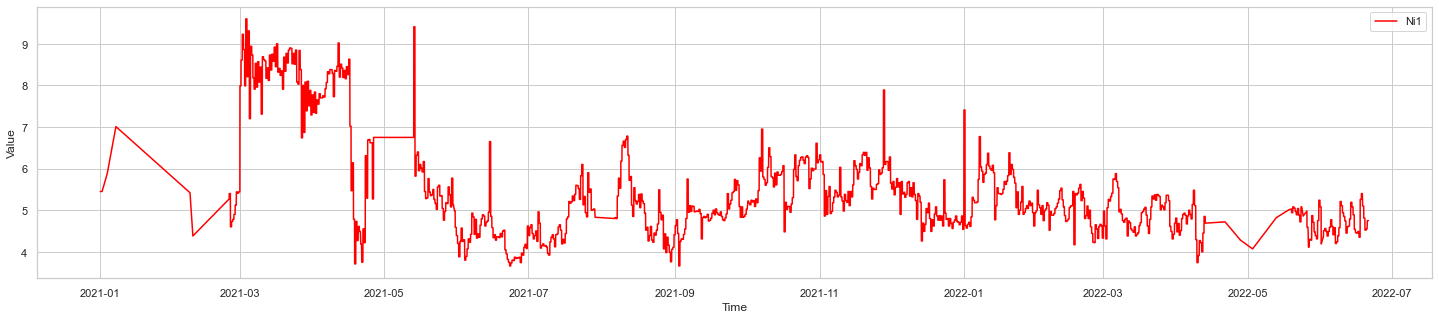

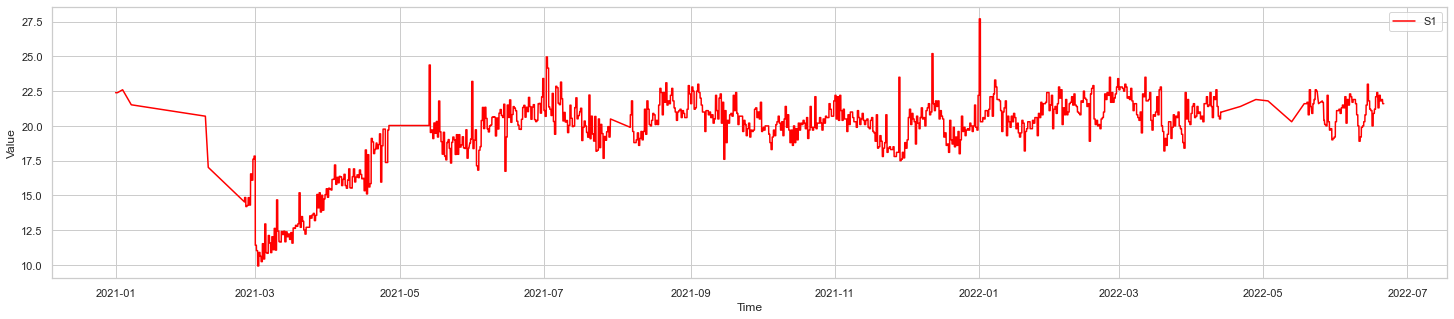

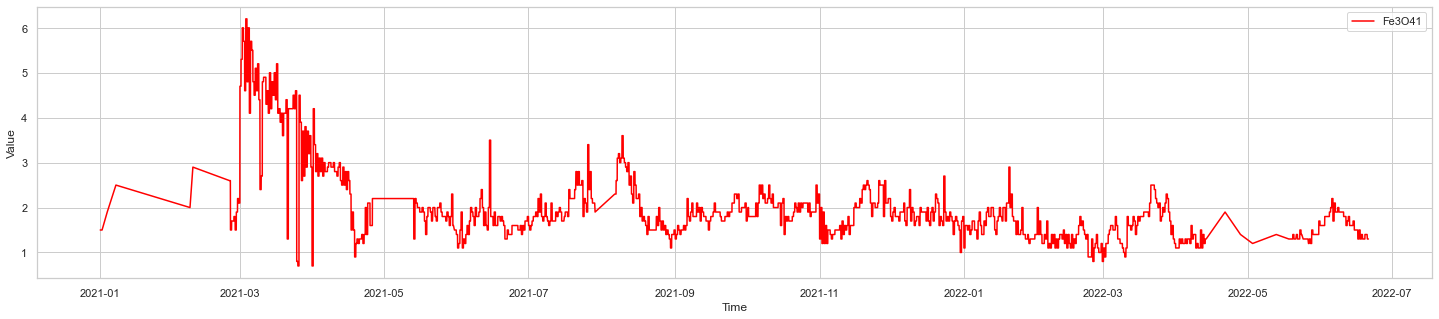

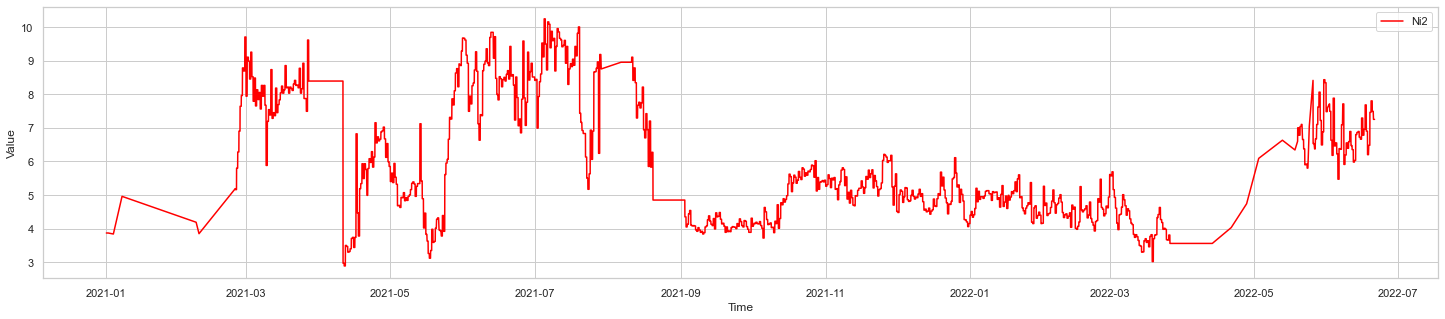

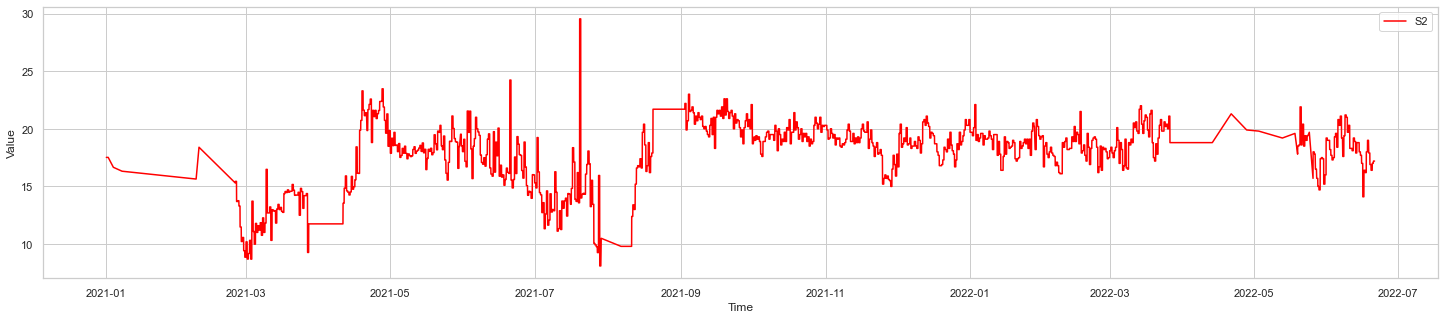

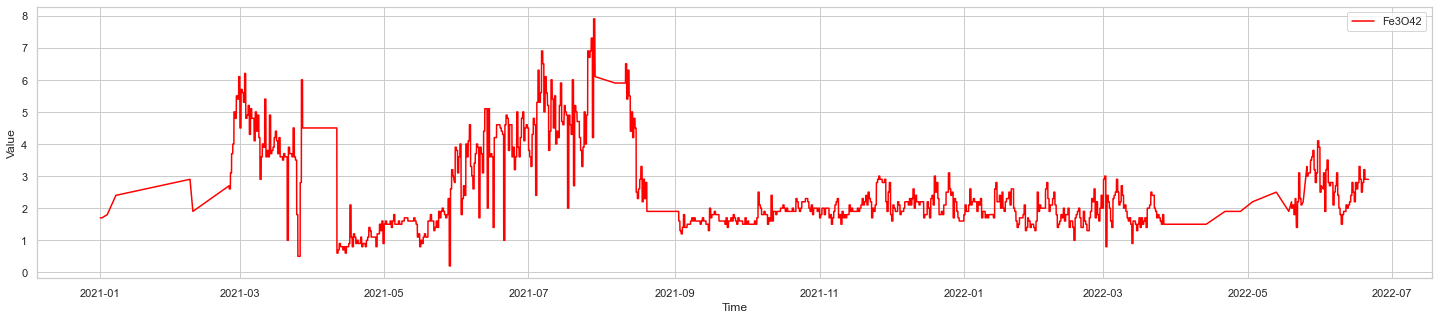

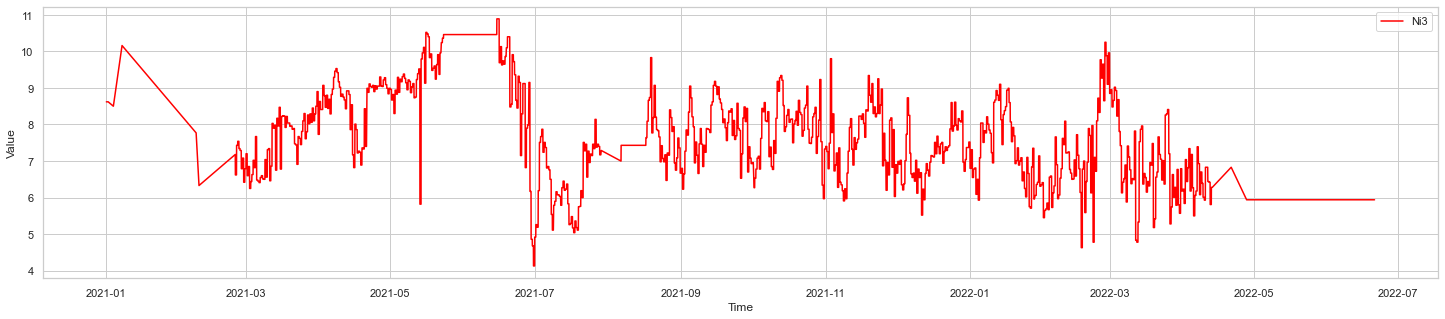

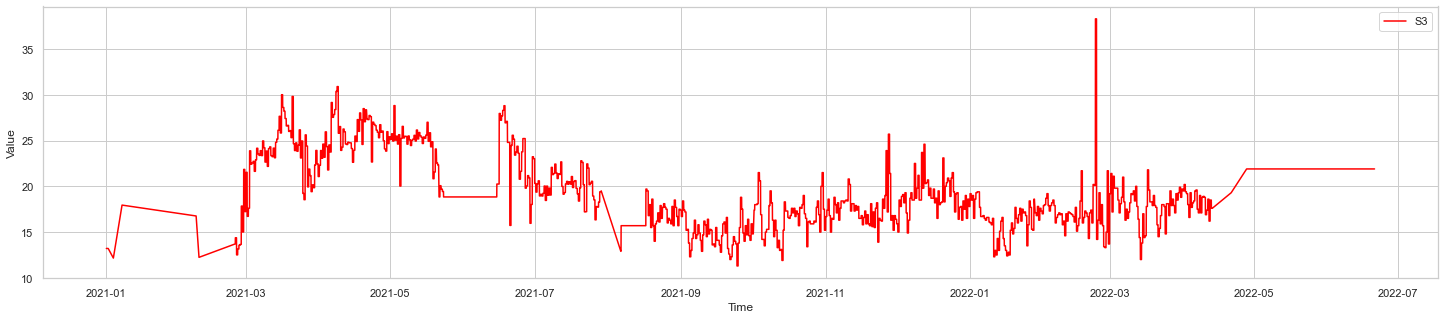

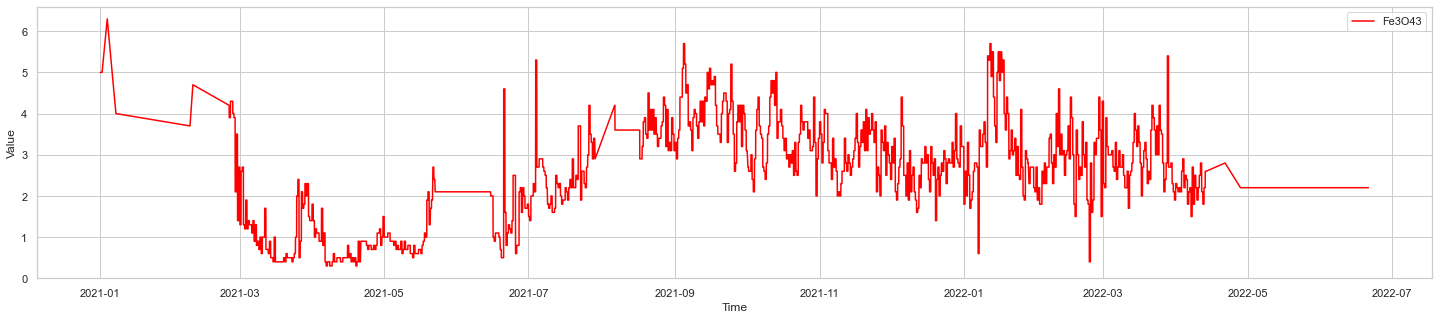

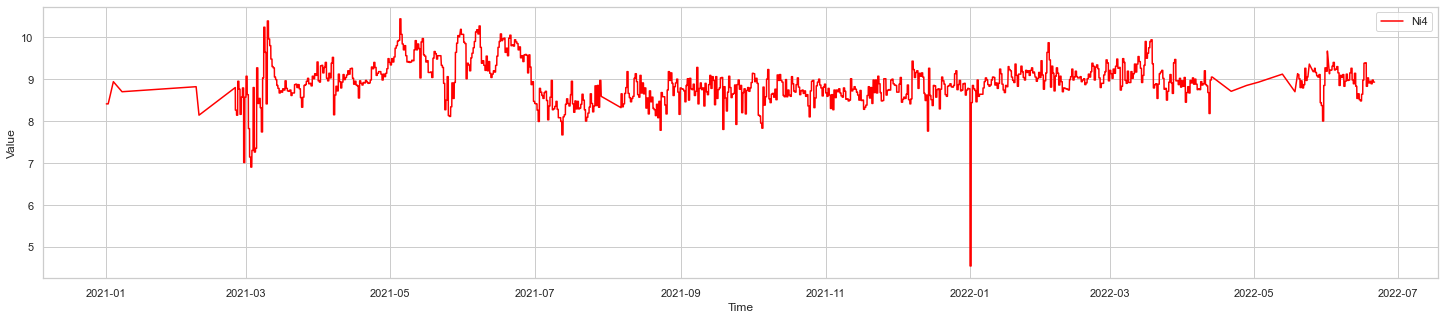

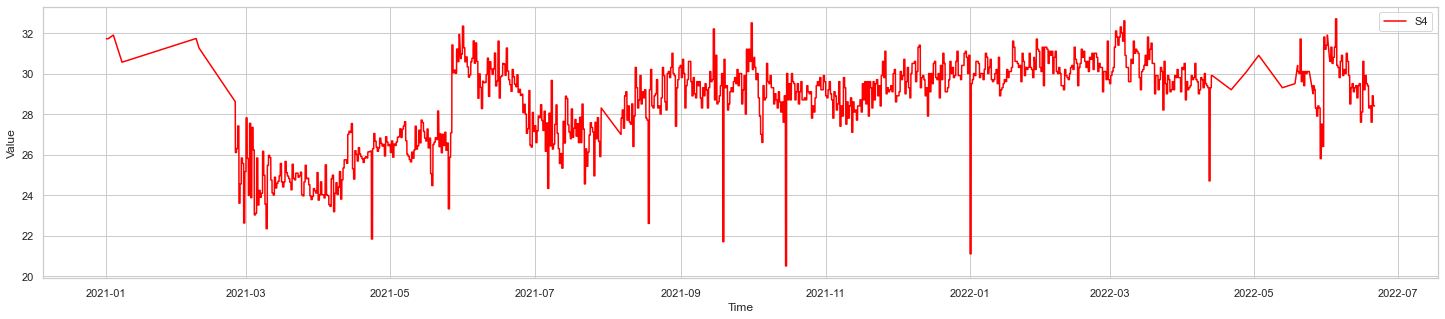

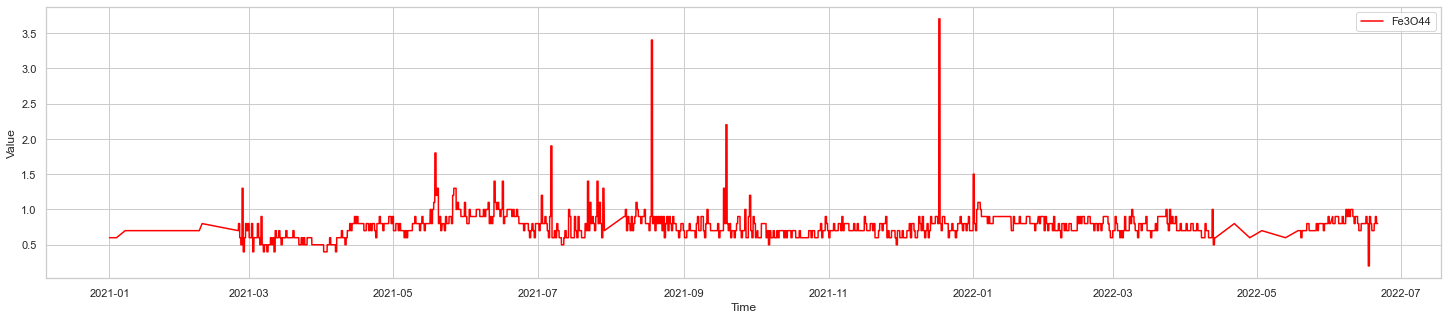

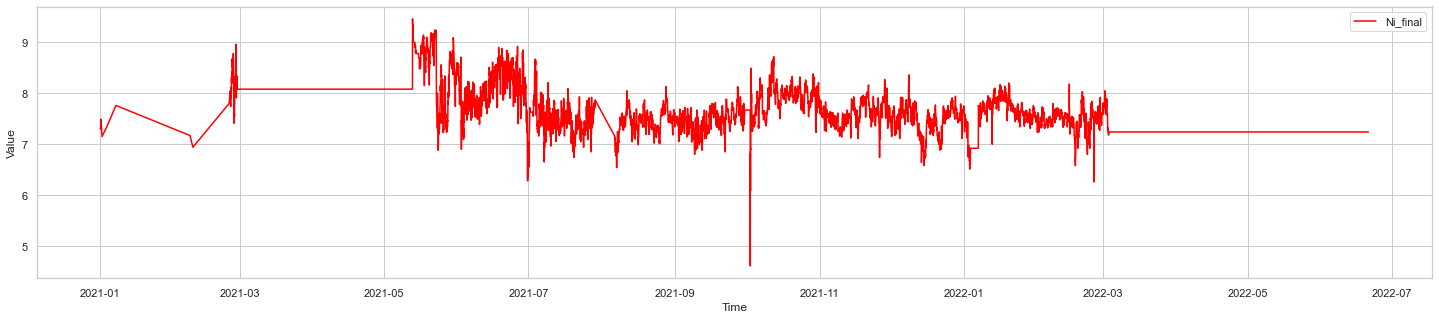

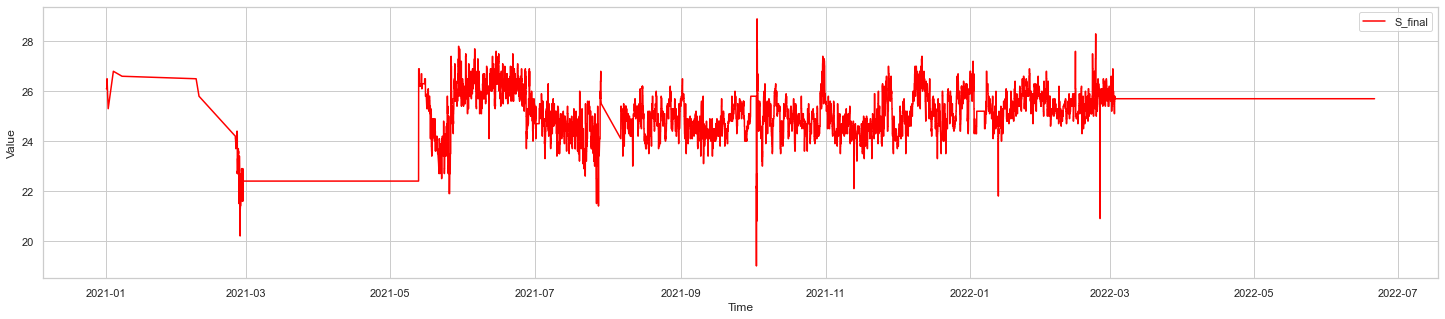

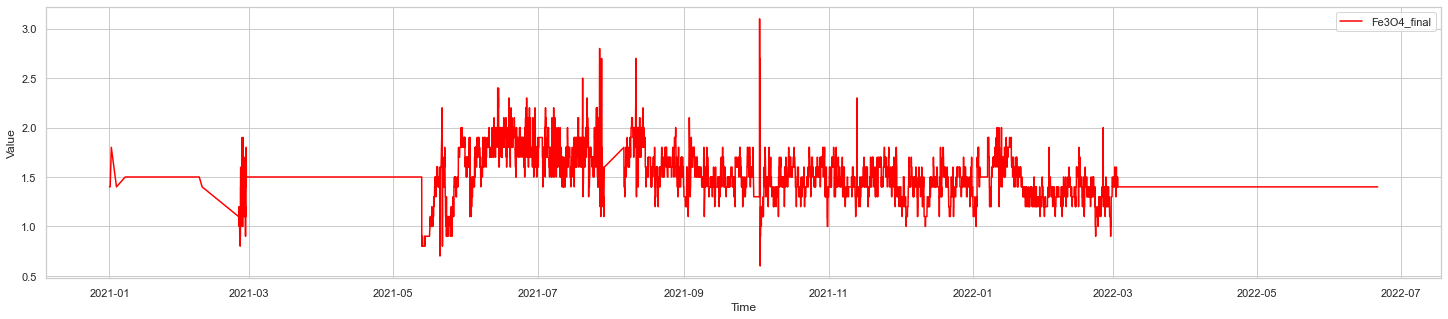

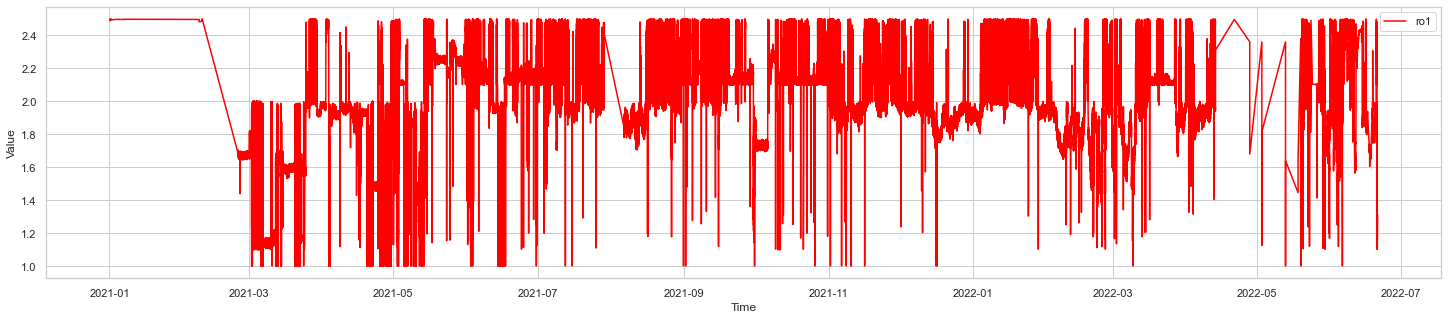

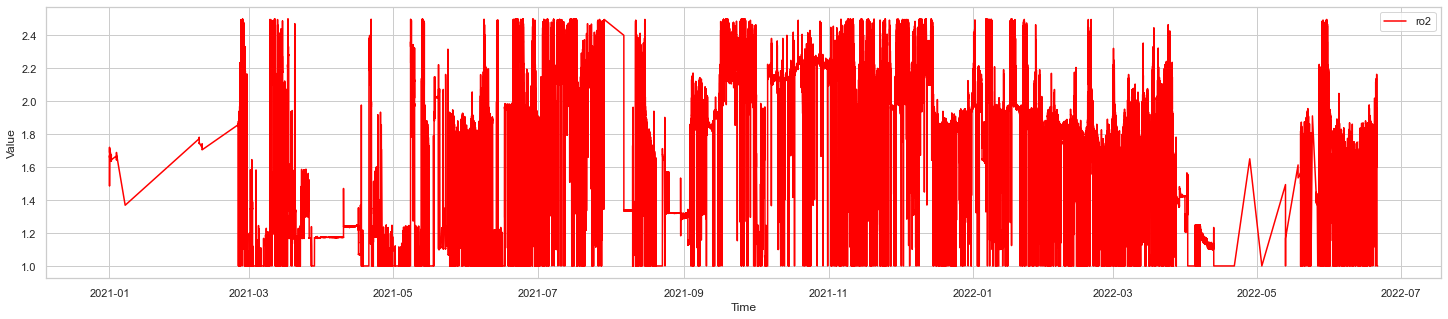

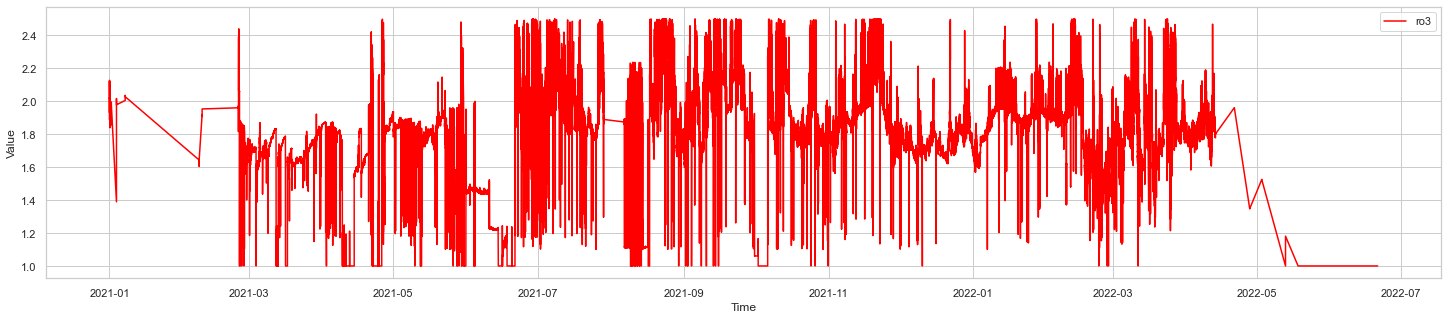

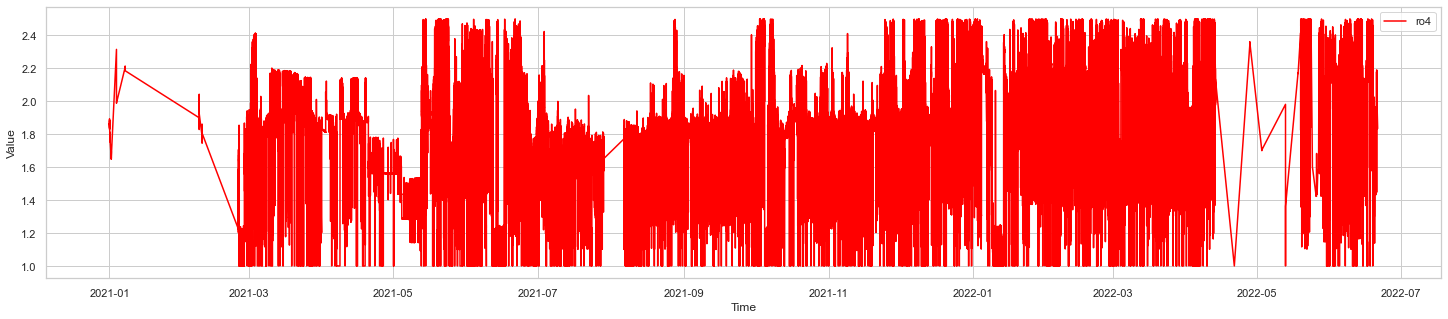

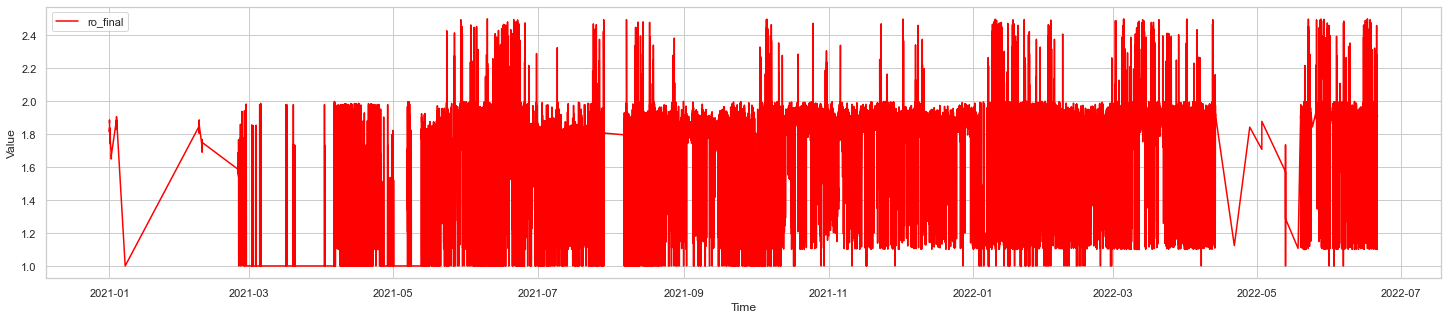

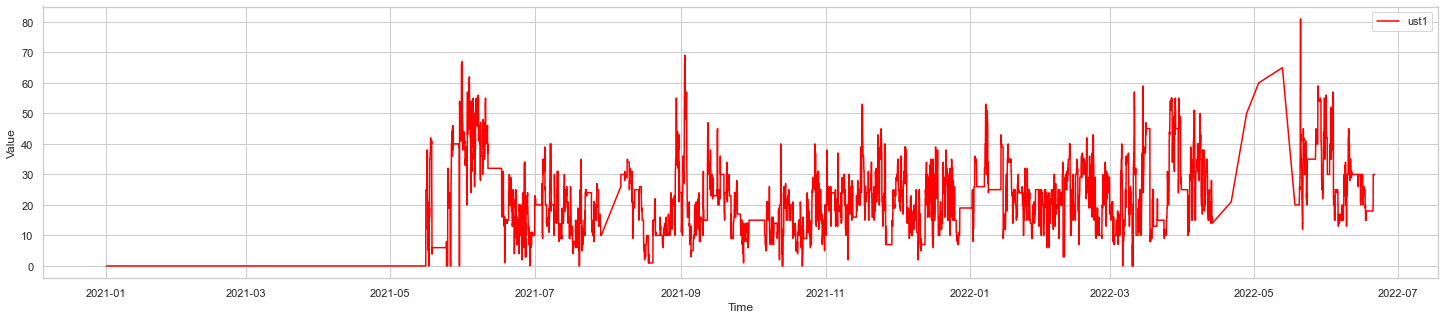

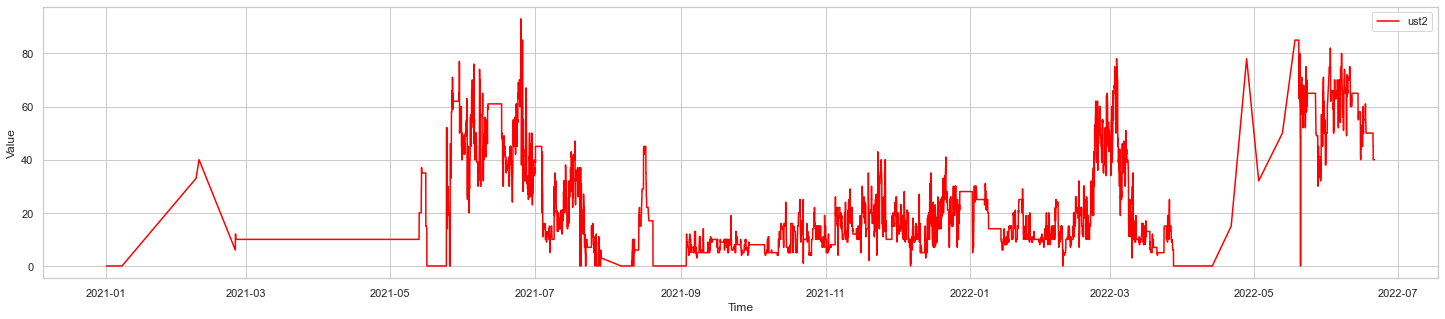

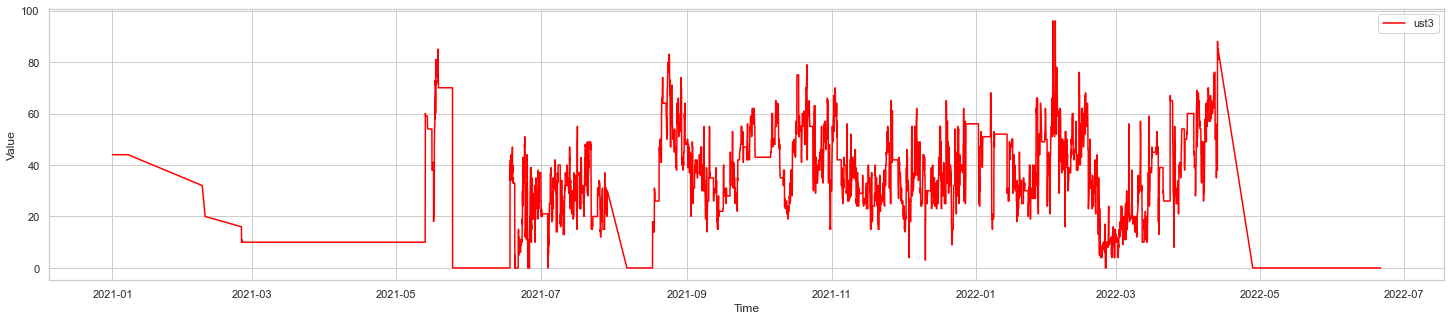

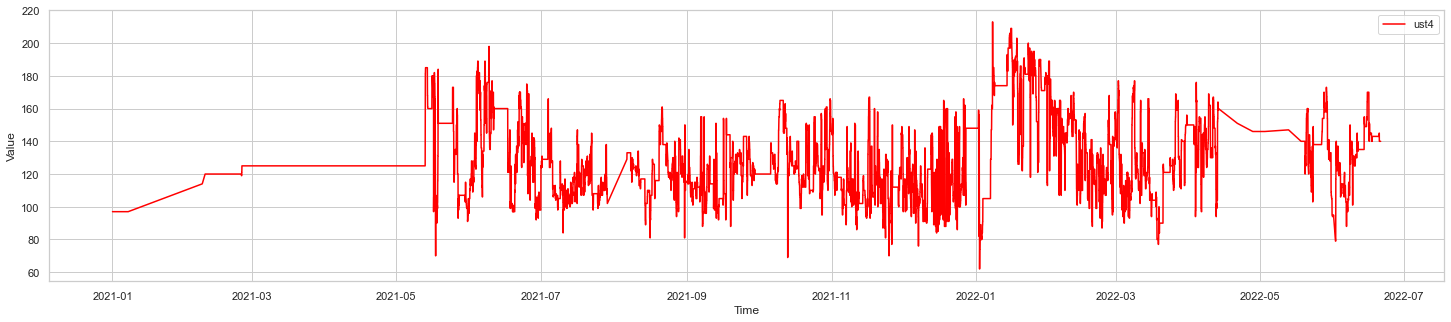

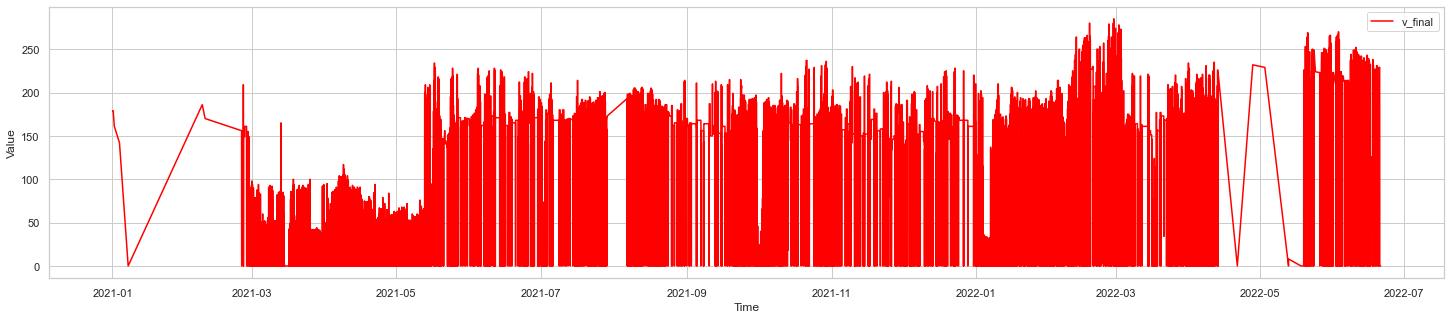

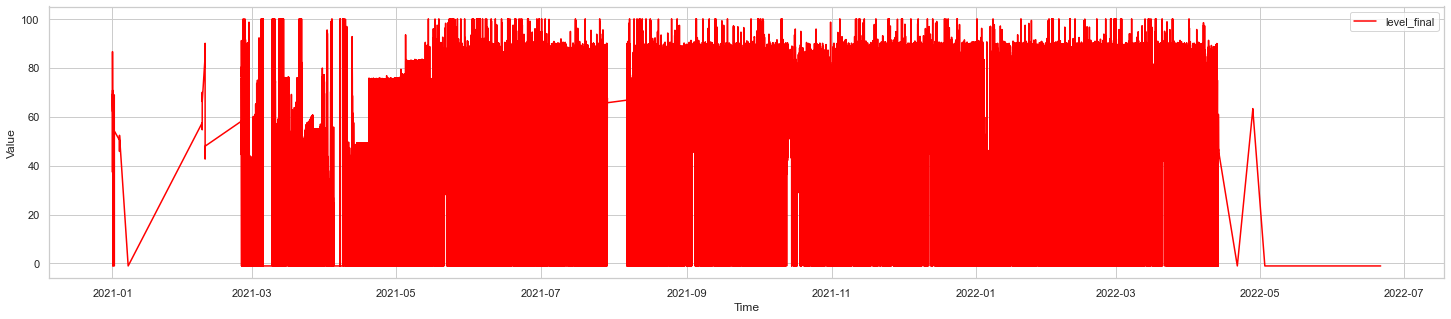

In [170]:
for column in df1.columns[1:]:
    plt.figure(figsize=(25, 5))
    plt.plot(df1['DateTime'], df1[column], label=column, color = 'red')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

    plt.show()

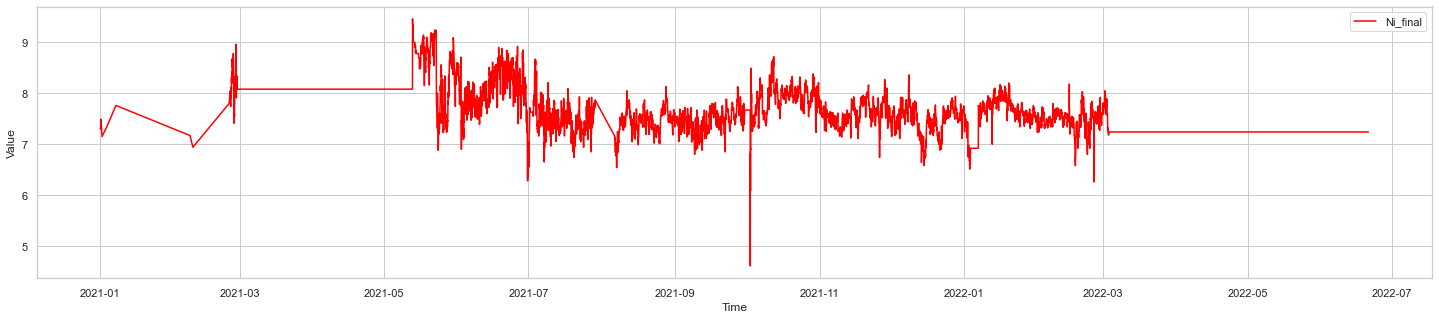

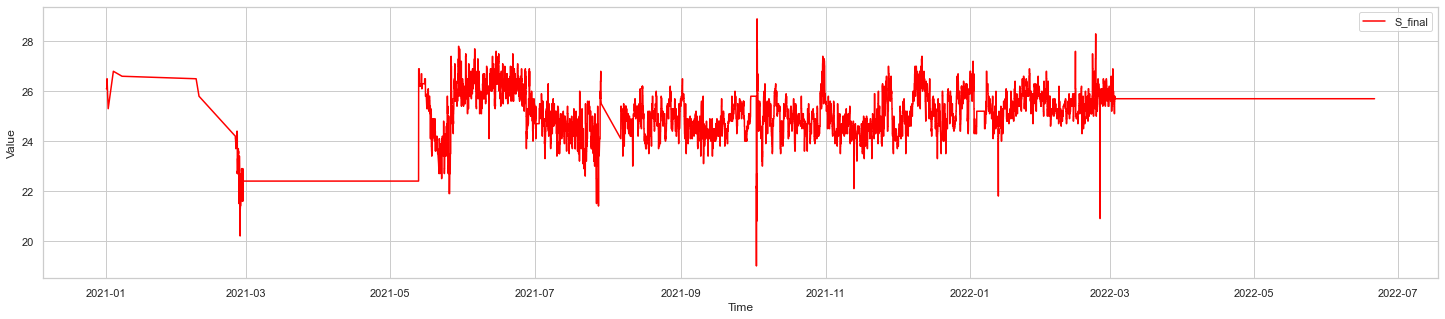

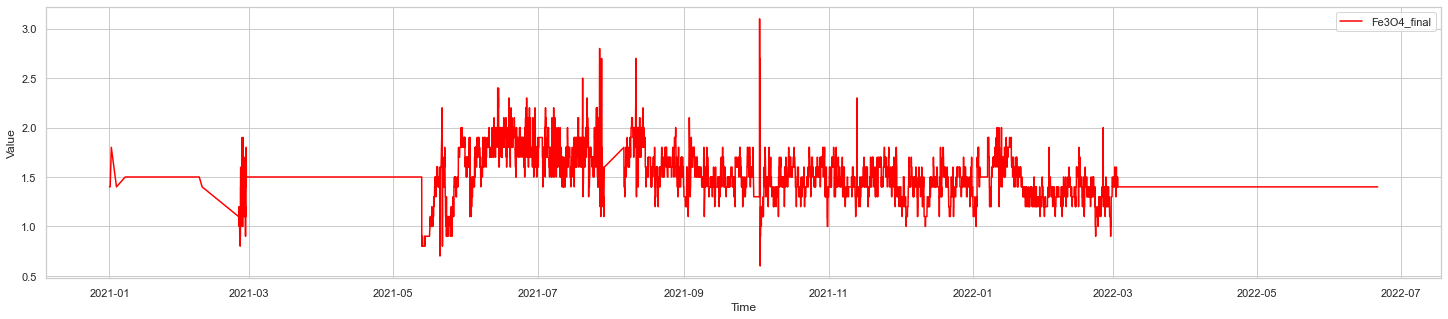

In [258]:
for column in ['Ni_final','S_final','Fe3O4_final']:
    plt.figure(figsize=(25, 5))
    plt.plot(df1['DateTime'], df1[column], label=column, color = 'red')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

    plt.show()

С графиков можно увидеть что процесс является некорректним к начале и уходит на константу раньше чем измерения закончились.
Поэтому рассмотрим только данные в диапазоне дат 2021-06 / 2022-03.

In [318]:
start_date = pd.to_datetime('2021-06')
end_date = pd.to_datetime('2022-03')

df1 = df1[(df1['DateTime'] >= start_date) & (df1['DateTime'] <= end_date)]

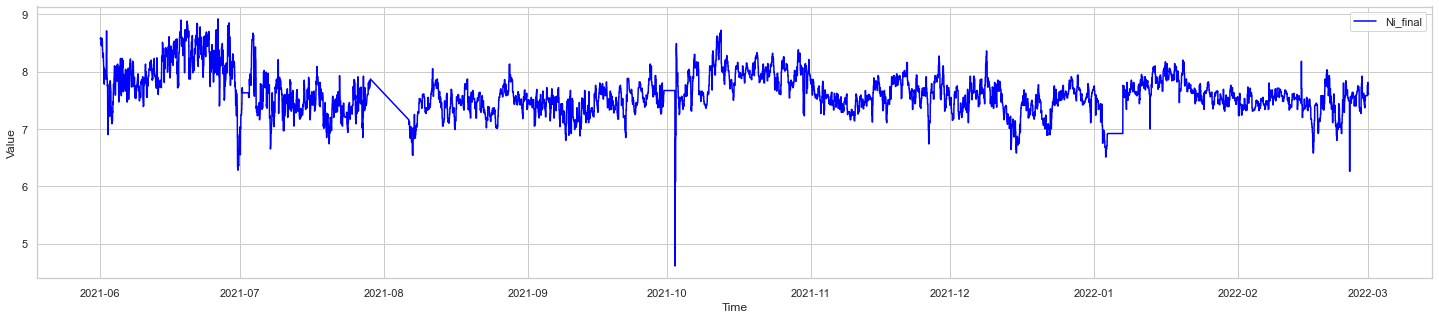

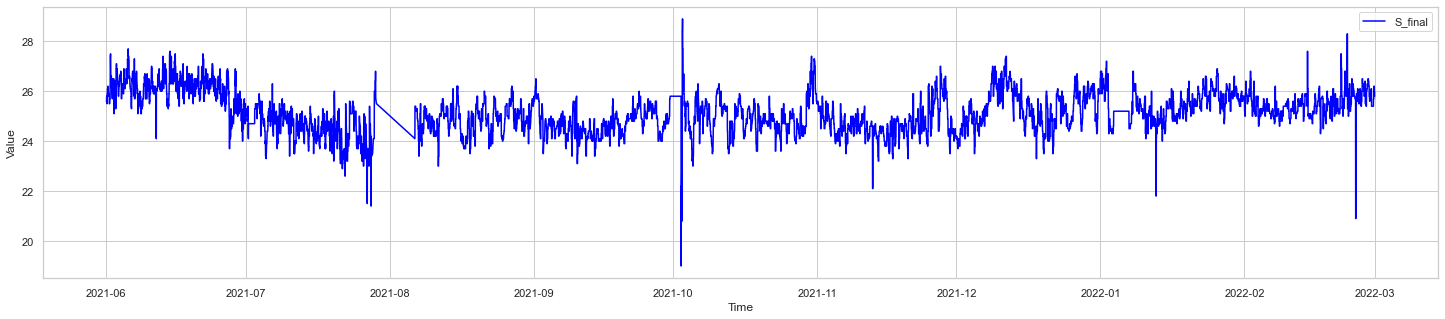

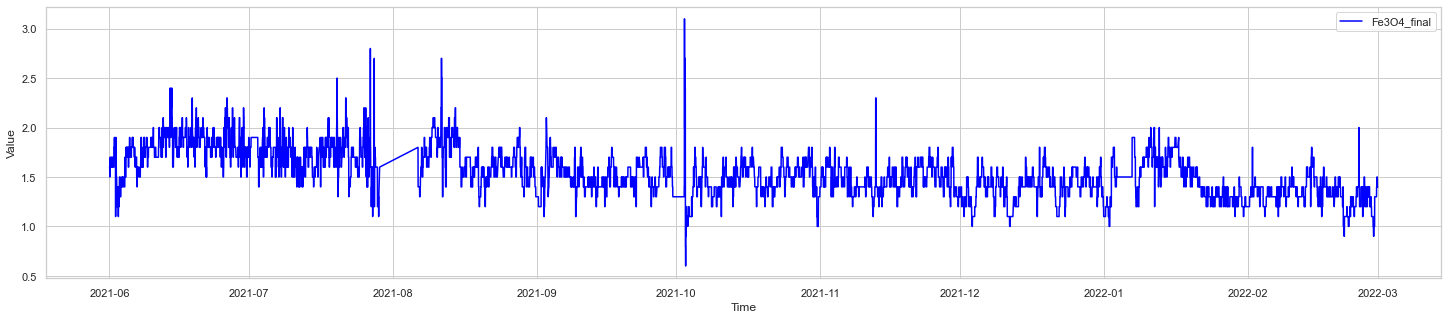

In [319]:
for column in ['Ni_final','S_final','Fe3O4_final']:
    plt.figure(figsize=(25, 5))
    plt.plot(df1['DateTime'], df1[column], label=column, color = 'blue')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

    plt.show()

## Задача 2

* ### Математическая модель

Общий поток $Q$:

$$ Q = q_1 + q_2 + q_3 + q_4 $$

Финальная концентрация $Ni$:

$$ Ni_{{final}} = \frac{q_1∙Ni_1 + q_2∙Ni_2 + q_3∙Ni_3 + q_4∙Ni_4}{Q} $$

Финальная концентрация $S$:

$$ S_{{final}} = \frac{q_1∙S_1 + q_2∙S_2 + q_3∙S_3 + q_4∙S_4}{Q} $$

Финальная концентрация $Fe_3O_4$:

$$ Fe3O4_{{final}} = \frac{q_1∙Fe3O4_1 + q_2∙Fe3O4_2 + q_3∙Fe3O4_3 + q_4∙Fe3O4_4}{Q} $$

In [320]:
def math_model_Ni(data):
    
    Q_sum = data['ust1'] + data['ust2'] + data['ust3'] + data['ust4']
    Ni_pred = (data['Ni1']*data['ust1'] + data['Ni2']*data['ust2'] + data['Ni3']*data['ust3'] + data['Ni4']*data['ust4']) / Q_sum
    Ni = pd.concat([Ni_pred,data['Ni_final']], axis = 1)
    Ni = pd.DataFrame({'Ni_pred': Ni_pred, 'Ni_final': data['Ni_final'], 'DateTime': data['DateTime']})
    Ni.columns = ['Ni_pred','Ni_final', 'DateTime']
    
    return Ni

In [321]:
def math_model_S(data):
    
    Q_sum = data['ust1'] + data['ust2'] + data['ust3'] + data['ust4']
    S_pred = (data['S1']*data['ust1'] + data['S2']*data['ust2'] + data['S3']*data['ust3'] + data['S4']*data['ust4']) / Q_sum
    S = pd.DataFrame({'S_pred': S_pred, 'S_final': data['S_final'], 'DateTime': data['DateTime']})
    S.columns = ['S_pred','S_final', 'DateTime']
    
    return S

In [322]:
def math_model_Fe3O4(data):
    
    Q_sum = data['ust1'] + data['ust2'] + data['ust3'] + data['ust4']
    Fe3O4_pred = (data['Fe3O41']*data['ust1'] + data['Fe3O42']*data['ust2'] + data['Fe3O43']*data['ust3'] + data['Fe3O44']*data['ust4']) / Q_sum
    Fe3O4 = pd.DataFrame({'Fe3O4_pred': Fe3O4_pred, 'Fe3O4_final': data['Fe3O4_final'], 'DateTime': data['DateTime']})
    Fe3O4.columns = ['Fe3O4_pred','Fe3O4_final','DateTime']
    
    return Fe3O4

* ### Калибровка 

1)  Ni

In [331]:
Ni_data =  math_model_Ni(df1)
X = Ni_data['Ni_pred'].values.reshape(-1, 1) 
y = Ni_data['Ni_final'].values  

calibration_model = LinearRegression(fit_intercept=True)  
calibration_model.fit(X, y)

calibrated_predictions = calibration_model.predict(X)

mse_before_calibration = mean_squared_error(y, Ni_data['Ni_pred'])
mse_after_calibration = mean_squared_error(y, calibrated_predictions)

print(f'MSE до калибровки: {mse_before_calibration}')
print(f'MSE после калибровки: {mse_after_calibration}')

MSE до калибровки: 0.25564092540188693
MSE после калибровки: 0.07142217001128265


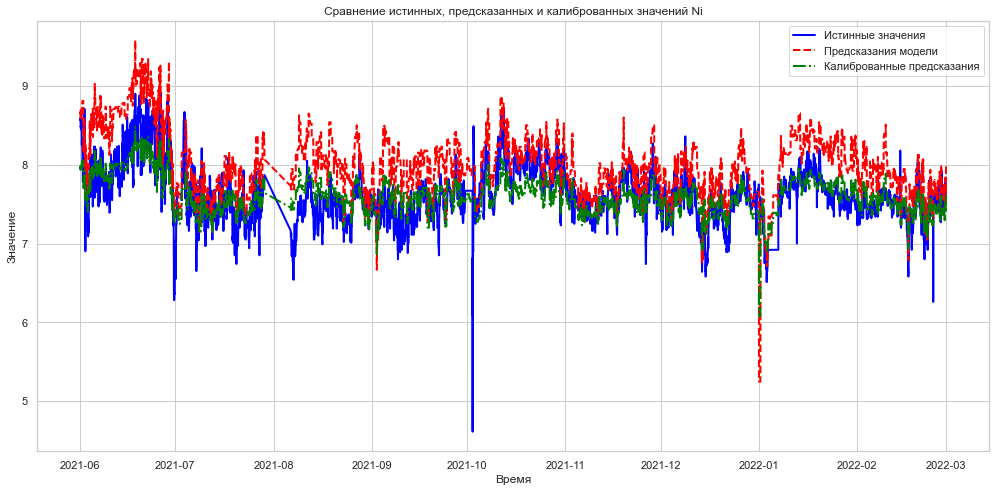

In [332]:
plt.figure(figsize=(14, 7)) 

plt.plot(Ni_data['DateTime'], Ni_data['Ni_final'], label='Истинные значения', color='blue', marker='', linestyle='-', linewidth=2)
plt.plot(Ni_data['DateTime'], Ni_data['Ni_pred'], label='Предсказания модели', color='red', marker='', linestyle='--', linewidth=2)
plt.plot(Ni_data['DateTime'], calibrated_predictions, label='Калиброванные предсказания', color='green', marker='', linestyle='-.', linewidth=2)

plt.xlabel('Время')  
plt.ylabel('Значение')  
plt.title('Сравнение истинных, предсказанных и калиброванных значений Ni') 
plt.legend()  
plt.grid(True)  
plt.tight_layout()  

plt.show()

2) S

In [333]:
S_data =  math_model_S(df1)
X = S_data['S_pred'].values.reshape(-1, 1) 
y = S_data['S_final'].values  

calibration_model = LinearRegression(fit_intercept=True)  
calibration_model.fit(X, y)

calibrated_predictions = calibration_model.predict(X)

mse_before_calibration = mean_squared_error(y, S_data['S_pred'])
mse_after_calibration = mean_squared_error(y, calibrated_predictions)

print(f'MSE до калибровки: {mse_before_calibration}')
print(f'MSE после калибровки: {mse_after_calibration}')

MSE до калибровки: 1.1997037872796144
MSE после калибровки: 0.5548208985395559


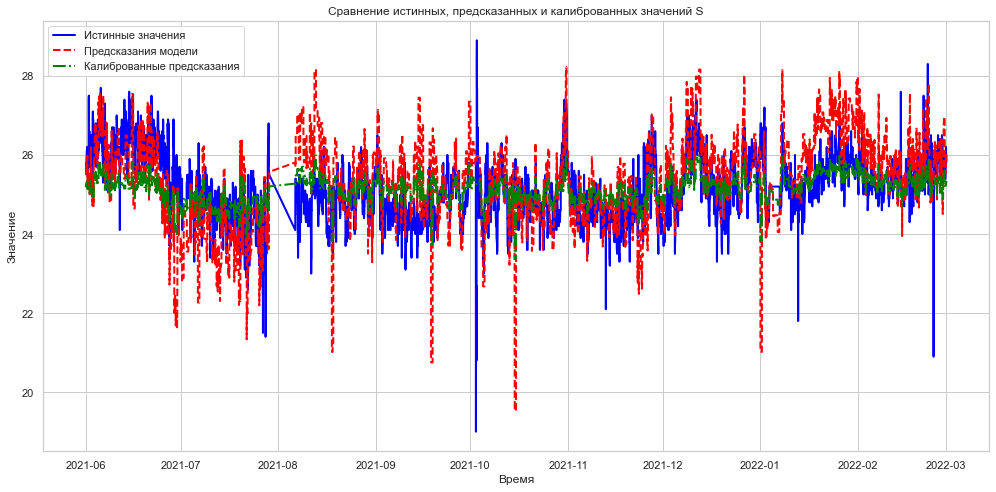

In [334]:
plt.figure(figsize=(14, 7)) 

plt.plot(S_data['DateTime'], S_data['S_final'], label='Истинные значения', color='blue', marker='', linestyle='-', linewidth=2)
plt.plot(S_data['DateTime'], S_data['S_pred'], label='Предсказания модели', color='red', marker='', linestyle='--', linewidth=2)
plt.plot(S_data['DateTime'], calibrated_predictions, label='Калиброванные предсказания', color='green', marker='', linestyle='-.', linewidth=2)

plt.xlabel('Время')  
plt.ylabel('Значение')  
plt.title('Сравнение истинных, предсказанных и калиброванных значений S') 
plt.legend()  
plt.grid(True)  
plt.tight_layout()  

plt.show()

3) Fe3O4

In [335]:
Fe3O4_data =  math_model_Fe3O4(df1)
X = Fe3O4_data['Fe3O4_pred'].values.reshape(-1, 1) 
y = Fe3O4_data['Fe3O4_final'].values  

calibration_model = LinearRegression(fit_intercept=True)  
calibration_model.fit(X, y)

calibrated_predictions = calibration_model.predict(X)

mse_before_calibration = mean_squared_error(y, Fe3O4_data['Fe3O4_pred'])
mse_after_calibration = mean_squared_error(y, calibrated_predictions)

print(f'MSE до калибровки: {mse_before_calibration}')
print(f'MSE после калибровки: {mse_after_calibration}')

MSE до калибровки: 0.06808326891181063
MSE после калибровки: 0.04327160135016566


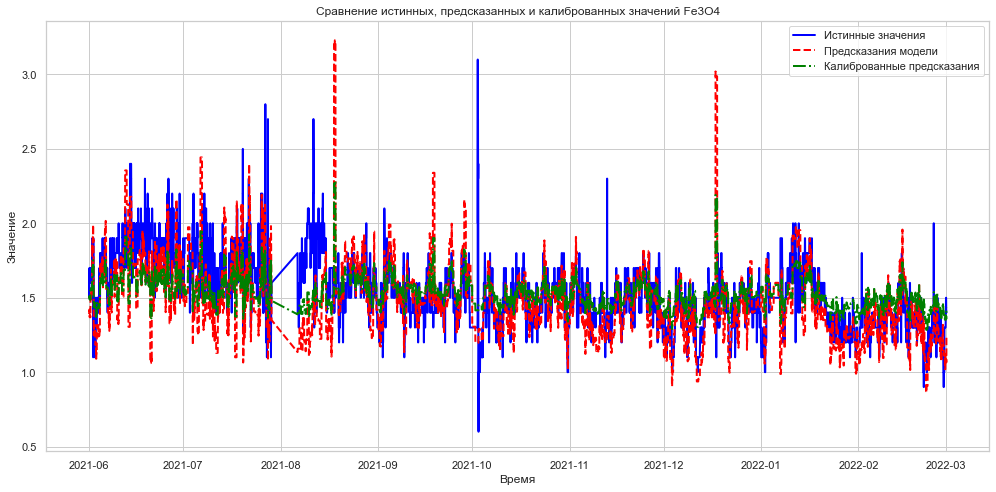

In [336]:
plt.figure(figsize=(14, 7)) 

plt.plot(Fe3O4_data['DateTime'], Fe3O4_data['Fe3O4_final'], label='Истинные значения', color='blue', marker='', linestyle='-', linewidth=2)
plt.plot(Fe3O4_data['DateTime'], Fe3O4_data['Fe3O4_pred'], label='Предсказания модели', color='red', marker='', linestyle='--', linewidth=2)
plt.plot(Fe3O4_data['DateTime'], calibrated_predictions, label='Калиброванные предсказания', color='green', marker='', linestyle='-.', linewidth=2)

plt.xlabel('Время')  
plt.ylabel('Значение')  
plt.title('Сравнение истинных, предсказанных и калиброванных значений Fe3O4') 
plt.legend()  
plt.grid(True)  
plt.tight_layout()  

plt.show()